### 5-2．機械学習のためのデータ準備
#### データセットの作成

In [1]:
# OpenCVのインストール
# !pip install opencv-python

In [2]:
import os
import cv2
import numpy as np

# 画像フォルダの指定
dirs = ['ants', 'bees']

# 画像のピクセル値とラベルを格納するリストを生成
pixels = [] # 説明変数
labels = [] # 目的変数

# 各フォルダのファイルを1つずつ読み込み、処理してリストへ格納
for i, d in enumerate(dirs):
    # ファイルの取得
    files = os.listdir('./data/' + d)
    
    for f in files:
        # 画像をグレースケールで読み込み
        img = cv2.imread('./data/' + d + '/' + f, 0)
        # 画像をリサイズ
        img = cv2.resize(img, (128, 128))
        # ピクセル値の格納
        img = np.array(img).flatten().tolist()
        pixels.append(img)
        
        # 画像のラベルをリストへ格納 
        labels.append(i)

In [3]:
import pandas as pd

# ピクセル値をデータフレーム形式へ変換
pixels_df = pd.DataFrame(pixels)
# display(pixels_df) # 0~255
pixels_df = pixels_df/255 # 正規化 0~1

# ラベルをデータフレーム形式へ変換
labels_df = pd.DataFrame(labels)
labels_df = labels_df.rename(columns={0: 'label'})

# 2つのデータフレームを水平結合
img_set = pd.concat([pixels_df, labels_df], axis=1)
display(img_set)

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,label
0,0.549020,0.552941,0.545098,0.552941,0.545098,0.556863,0.556863,0.556863,0.552941,0.556863,...,0.294118,0.282353,0.286275,0.274510,0.294118,0.286275,0.286275,0.278431,0.360784,0
1,0.756863,0.831373,0.894118,0.815686,0.862745,0.866667,0.737255,0.772549,0.768627,0.219608,...,0.866667,0.890196,0.933333,0.905882,0.882353,0.921569,0.945098,0.858824,0.823529,0
2,0.941176,0.917647,0.945098,0.933333,0.952941,0.886275,0.941176,0.788235,0.882353,0.933333,...,0.717647,0.552941,0.729412,0.686275,0.239216,0.352941,0.443137,0.462745,0.596078,0
3,0.537255,0.533333,0.521569,0.545098,0.552941,0.564706,0.580392,0.592157,0.600000,0.623529,...,0.462745,0.454902,0.470588,0.474510,0.466667,0.466667,0.470588,0.458824,0.470588,0
4,0.521569,0.545098,0.549020,0.564706,0.572549,0.592157,0.588235,0.584314,0.580392,0.568627,...,0.537255,0.564706,0.674510,0.541176,0.482353,0.800000,0.894118,0.611765,0.654902,0
5,0.470588,0.478431,0.494118,0.494118,0.470588,0.470588,0.509804,0.482353,0.482353,0.494118,...,0.752941,0.811765,0.854902,0.862745,0.815686,0.831373,0.682353,0.725490,0.752941,0
6,0.745098,0.694118,0.666667,0.682353,0.745098,0.807843,0.835294,0.827451,0.796078,0.784314,...,0.070588,0.074510,0.070588,0.070588,0.070588,0.070588,0.070588,0.074510,0.078431,0
7,0.345098,0.403922,0.407843,0.498039,0.588235,0.607843,0.572549,0.619608,0.603922,0.509804,...,0.937255,0.917647,0.886275,0.866667,0.901961,0.901961,0.905882,0.894118,0.890196,0
8,0.007843,0.007843,0.011765,0.003922,0.003922,0.003922,0.007843,0.007843,0.007843,0.003922,...,0.843137,0.749020,0.741176,0.309804,0.372549,0.376471,0.247059,0.670588,0.662745,0
9,0.384314,0.392157,0.392157,0.396078,0.396078,0.392157,0.380392,0.388235,0.376471,0.392157,...,0.227451,0.156863,0.066667,0.023529,0.035294,0.047059,0.015686,0.007843,0.007843,0


In [4]:
# 練習問題4
# 画像のピクセル値とラベルを格納するリストを生成
pixels2 = [] # 説明変数
labels2 = [] # 目的変数
tmp = []

# 各フォルダのファイルを1つずつ読み込み、処理してリストへ格納
for i, d in enumerate(dirs):
    # ファイルの取得
    files = os.listdir('./data/' + d)
    
    for f in files:
        # 画像をグレースケールで読み込み
        img2 = cv2.imread('./data/' + d + '/' + f)
        # 画像をリサイズ
        img2 = cv2.resize(img2, (128, 128))
        # ピクセル配列をB、G、Rごとに分割
        b, g, r = cv2.split(img2)        
        # ピクセル値の格納
        b = np.array(b).flatten().tolist()
        g = np.array(g).flatten().tolist()
        r = np.array(r).flatten().tolist()
        tmp = b + g + r
        pixels2.append(tmp)
        
        # 画像のラベルをリストへ格納 
        labels2.append(i)

In [5]:
# 練習問題4
# ピクセル値をデータフレーム形式へ変換
pixels2_df = pd.DataFrame(pixels2)
pixels2_df = pixels2_df/255 # 正規化

# ラベルをデータフレーム形式へ変換
labels2_df = pd.DataFrame(labels2)
labels2_df = labels2_df.rename(columns={0: 'label'})

# 2つのデータフレームを水平結合
img_set2 = pd.concat([pixels2_df, labels2_df], axis=1)
img_set2.head()

# 
img_set2

,0,1,2,3,4,5,6,7,8,9,...,49143,49144,49145,49146,49147,49148,49149,49150,49151,label
0,0.917647,0.921569,0.913725,0.921569,0.913725,0.925490,0.925490,0.925490,0.913725,0.925490,...,0.192157,0.180392,0.184314,0.172549,0.192157,0.188235,0.184314,0.176471,0.211765,0
1,0.662745,0.764706,0.835294,0.725490,0.792157,0.815686,0.698039,0.670588,0.611765,0.129412,...,0.878431,0.901961,0.952941,0.921569,0.905882,0.933333,0.945098,0.878431,0.847059,0
2,1.000000,0.956863,0.996078,0.980392,0.980392,0.933333,0.996078,0.878431,0.937255,0.964706,...,0.650980,0.517647,0.654902,0.619608,0.266667,0.376471,0.427451,0.454902,0.592157,0
3,0.470588,0.470588,0.478431,0.501961,0.525490,0.545098,0.552941,0.556863,0.556863,0.568627,...,0.517647,0.521569,0.529412,0.545098,0.525490,0.533333,0.533333,0.521569,0.556863,0
4,0.494118,0.501961,0.501961,0.521569,0.537255,0.556863,0.552941,0.556863,0.549020,0.537255,...,0.721569,0.749020,0.811765,0.709804,0.694118,0.878431,0.945098,0.764706,0.819608,0
5,0.349020,0.329412,0.372549,0.372549,0.333333,0.337255,0.368627,0.321569,0.337255,0.333333,...,0.827451,0.878431,0.870588,0.870588,0.870588,0.878431,0.792157,0.792157,0.776471,0
6,0.764706,0.713725,0.686275,0.701961,0.764706,0.835294,0.862745,0.839216,0.792157,0.756863,...,0.058824,0.062745,0.058824,0.058824,0.058824,0.058824,0.058824,0.062745,0.066667,0
7,0.325490,0.376471,0.435294,0.545098,0.607843,0.647059,0.643137,0.662745,0.596078,0.517647,...,0.937255,0.909804,0.874510,0.870588,0.898039,0.901961,0.905882,0.894118,0.905882,0
8,0.000000,0.003922,0.003922,0.000000,0.000000,0.000000,0.000000,0.000000,0.007843,0.000000,...,0.996078,0.980392,0.917647,0.509804,0.576471,0.600000,0.498039,0.839216,0.807843,0
9,0.137255,0.149020,0.149020,0.152941,0.152941,0.149020,0.137255,0.145098,0.137255,0.149020,...,0.250980,0.168627,0.094118,0.035294,0.090196,0.086275,0.031373,0.015686,0.011765,0


#### モルフォロジー変換

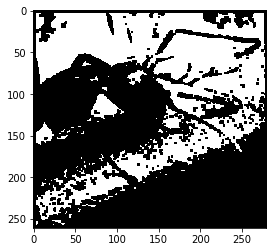

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# 画像をグレースケールで読み込み
img = cv2.imread('./data/ants/swiss-army-ant.jpg', 0)
# 2値化画像へ変換
ret, bin_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
# print(ret, bin_img)
# 画像の収縮
kernel = np.ones((3,3), np.uint8) # np.unit8は行列内をint型にしている
# print(kernel)
img_el = cv2.erode(bin_img, kernel, iterations=1) # iterationsは処理の回数
plt.imshow(img_el, cmap='gray')

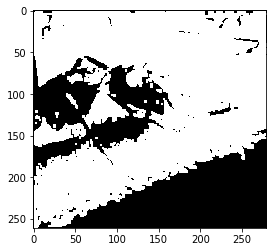

In [7]:
# 画像の膨張
img_dl = cv2.dilate(bin_img, kernel, iterations=1)
plt.imshow(img_dl, cmap='gray')

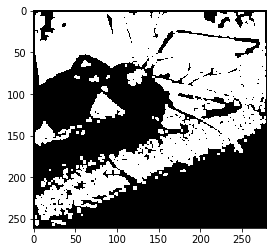

In [8]:
# 画像のオープニング
img_op = cv2.morphologyEx(bin_img, cv2.MORPH_OPEN, kernel)
plt.imshow(img_op, cmap='gray')

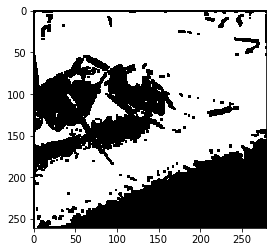

In [9]:
# 画像のクロージング
img_cl = cv2.morphologyEx(bin_img, cv2.MORPH_CLOSE, kernel)
plt.imshow(img_cl, cmap='gray')

#### ヒストグラムの作成

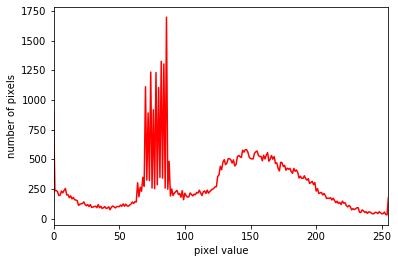

In [10]:
# ヒストグラムの作成
hist_gr, bins = np.histogram(img.ravel(), 256, [0,256])

# ヒストグラムの描画
plt.xlim(0, 255)
plt.plot(hist_gr, '-r')
plt.xlabel('pixel value')
plt.ylabel('number of pixels')
plt.show()

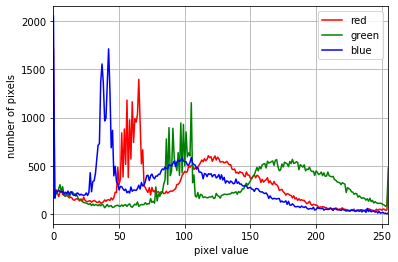

In [11]:
# 練習問題5
# 画像をカラーで読み込み
img = cv2.imread('./data/ants/swiss-army-ant.jpg')

# RGBヒストグラムの作成
b, g, r = img[:,:,0], img[:,:,1], img[:,:,2]
hist_r, bins = np.histogram(r.ravel(), 256, [0,256])
hist_g, bins = np.histogram(g.ravel(), 256, [0,256])
hist_b, bins = np.histogram(b.ravel(), 256, [0,256])

# RGBヒストグラムの描画
plt.xlim(0, 255)
plt.plot(hist_r, '-r', label='red')
plt.plot(hist_g, '-g', label='green')
plt.plot(hist_b, '-b', label='blue')
plt.xlabel('pixel value')
plt.ylabel('number of pixels')
plt.legend()
plt.grid()
plt.show()

#### PCAによる次元圧縮

In [12]:
# 練習問題6
# PCAの読み込み
from sklearn.decomposition import PCA

# 主成分を累積寄与率80％まで抽出
pca = PCA(0.80)
pixels_pca = pca.fit_transform(pixels_df)

# 主成分数を確認
print(pca.n_components_)

# 次元圧縮したデータセットのサイズを確認
print(pixels_pca.shape)

65
(397, 65)


In [13]:
# PCA適用後の説明変数と目的変数を結合
img_set_pca = pd.concat([pd.DataFrame(pixels_pca), labels_df], axis=1)
img_set_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,label
0,8.585932,-2.592704,1.296475,-0.270453,1.362006,-1.552697,-1.112306,-0.823676,0.730632,0.517815,...,-0.717115,-0.392132,-0.452940,0.170282,0.083957,-0.227805,-0.098932,-0.030707,-0.464957,0
1,31.880076,-6.093543,6.490104,8.356649,3.687303,-5.482400,-1.098567,2.470296,1.352513,0.514062,...,1.410570,0.039913,-0.730414,1.393114,0.829098,1.859050,1.778975,-0.940773,-1.131724,0
2,42.004818,-2.950135,-8.028556,-8.161433,-1.800311,6.361601,4.497587,-3.424305,6.002184,-3.423000,...,0.422420,-1.205339,-0.207441,-1.047376,-1.888064,0.338827,-0.047465,0.613203,-0.561086,0
3,-3.303601,4.567248,-5.000806,-1.761876,0.740168,5.260692,0.151167,-0.634079,1.015606,-2.544271,...,-0.629686,-0.237305,0.345499,-0.012991,-0.329349,-0.114332,-0.864171,-0.046132,-0.995686,0
4,11.635159,1.743388,-0.714645,0.065259,-0.623635,3.251193,2.580930,0.577941,-2.747210,-0.128650,...,-0.028143,-0.591124,-0.249288,0.193581,-0.718916,-0.538968,1.195285,1.557111,0.033498,0


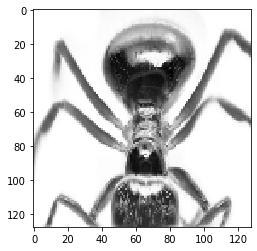

In [14]:
# 元の画像を描画
# for i in range(193):
#     print(i)
#     plt.imshow(np.array(pixels_df)[i].reshape(128, 128), cmap='gray')
#     plt.show()
plt.imshow(np.array(pixels_df)[165].reshape(128, 128), cmap='gray')

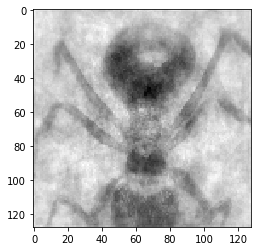

In [15]:
# 圧縮した画像を描画
pixels_low = pca.inverse_transform(pixels_pca)
plt.imshow(pixels_low[165].reshape(128, 128), cmap='gray')

#### t-SNEによる次元圧縮

In [16]:
from sklearn.manifold import TSNE

# 特徴量を2軸抽出
tsne = TSNE(n_components=2)
pixels_tsne = tsne.fit_transform(pixels_df)

# 次元数の確認
print(pixels_df.shape) # 圧縮前
print(pixels_tsne.shape) # 圧縮後

# t-SNE適用後の説明変数と目的変数を結合
img_set_tsne = pd.concat([pd.DataFrame(pixels_tsne), labels_df], axis=1)
img_set_tsne.head()

(397, 16384)
(397, 2)


,0,1,label
0,-4.194252,-2.935427,0
1,-8.400255,-7.394510,0
2,-10.499445,-7.460005,0
3,1.788093,0.235240,0
4,-4.439492,-5.328898,0


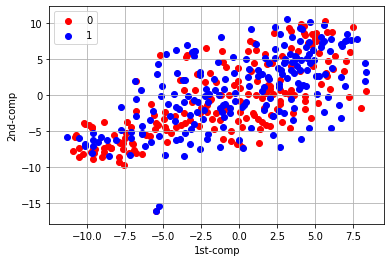

In [17]:
# 0の描画
img_set_tsne_0 = img_set_tsne[img_set_tsne['label'] == 0]
img_set_tsne_0 = img_set_tsne_0.drop('label', axis=1)
plt.scatter(img_set_tsne_0[0], img_set_tsne_0[1], c='red', label=0)
# 1の描画
img_set_tsne_1 = img_set_tsne[img_set_tsne['label'] == 1]
img_set_tsne_1 = img_set_tsne_1.drop('label', axis=1)
plt.scatter(img_set_tsne_1[0], img_set_tsne_1[1], c='blue', label=1)

plt.xlabel('1st-comp')
plt.ylabel('2nd-comp')
plt.legend()
plt.grid()
plt.show()

In [18]:
pca = PCA(n_components=2)
pixels_pca2 = pca.fit_transform(pixels_df)

# 次元数の確認
print(pixels_df.shape) # 圧縮前
print(pixels_pca2.shape) # 圧縮後

# t-SNE適用後の説明変数と目的変数を結合
img_set_pca2 = pd.concat([pd.DataFrame(pixels_pca2), labels_df], axis=1)
img_set_pca2.head()

(397, 16384)
(397, 2)


,0,1,label
0,8.585932,-2.592704,0
1,31.880076,-6.093543,0
2,42.004818,-2.950135,0
3,-3.303601,4.567249,0
4,11.635159,1.743388,0


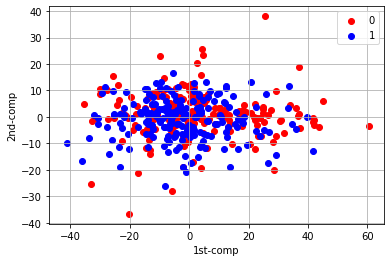

In [19]:
# 0の描画
img_set_pca2_0 = img_set_pca2[img_set_pca2['label'] == 0]
img_set_pca2_0 = img_set_pca2_0.drop('label', axis=1)
plt.scatter(img_set_pca2_0[0], img_set_pca2_0[1], c='red', label=0)
# 1の描画
img_set_pca2_1 = img_set_pca2[img_set_pca2['label'] == 1]
img_set_pca2_1 = img_set_pca2_1.drop('label', axis=1)
plt.scatter(img_set_pca2_1[0], img_set_pca2_1[1], c='blue', label=1)

plt.xlabel('1st-comp')
plt.ylabel('2nd-comp')
plt.legend()
plt.grid()
plt.show()